In [1]:
from __future__ import print_function
%matplotlib notebook
#%matplotlib inline
import numpy as np
import math
import random

import torch
import torch.nn.parallel


Bad key "text.kerning_factor" on line 4 in
/home/shidi/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
import sys

from model import trainPrimitives

sys.path.append('/home/shidi/3d-generate/code/TreeGAN/dataloader')
from dataset_benchmark import BenchmarkDataset, BenchmarkDatasetOnTheFly

In [3]:
SEED = 0 
random.seed(SEED) 
np.random.seed(SEED) 
torch.manual_seed(SEED) 

In [4]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
torch.cuda.set_device(device)
# device = torch.device('cpu')

In [5]:
############################## Data loader ####################################
print('Loading data.........')
# Root directory for dataset
dataroot = '../../data/datasetTreeGAN/shapenetcore_partanno_segmentation_benchmark_v0/'

category = 'chair'
# data = BenchmarkDataset(dataroot, npoints=2048, uniform=False, classification=False, class_choice=category, device=device)
data = BenchmarkDatasetOnTheFly(dataroot, npoints=2048, uniform=False, classification=False, class_choice=category, device=device)

split = 0.9
total_num = data.__len__()
train_num = math.floor(total_num*split)
test_num = total_num - train_num
train_set, test_set = torch.utils.data.random_split(data, [train_num, test_num])

batch_size = 15
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, num_workers=0, drop_last=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size, num_workers=0, drop_last=True)

print(total_num)

Loading data.........
{'chair': 0}
3746


In [6]:
n_parts = 8
regs_term = {"regularizer_type": ['bernoulli_regularizer', 'parsimony_regularizer', 'overlapping_regularizer'],
             "bernoulli_regularizer_weight": 1,
             "entropy_bernoulli_regularizer_weight": 0,
             "parsimony_regularizer_weight": 1e-3,
             "sparsity_regularizer_weight": 0,
             "overlapping_regularizer_weight": 1e-6,
             "minimum_number_of_primitives": 4,
             "maximum_number_of_primitives": n_parts,
             "w1": 0.005,
             "w2": 0.005}
# regs_term = {"regularizer_type": ['bernoulli_regularizer', 'parsimony_regularizer'],
#              "bernoulli_regularizer_weight": 200,
#              "entropy_bernoulli_regularizer_weight": 0,
#              "parsimony_regularizer_weight": 1e-3,
#              "sparsity_regularizer_weight": 0,
#              "overlapping_regularizer_weight": 0,
#              "minimum_number_of_primitives": 1,
#              "maximum_number_of_primitives": 20,
#              "w1": 0.005,
#              "w2": 0.005}

In [7]:
model = trainPrimitives(train_loader=train_loader, 
                        test_loader=test_loader,
                        device=device, path = 'fit_primitives2', regularizer_terms=regs_term,
                        category = category, n_parts = n_parts)

torch.Size([15, 2048, 3])
[[1.0396602e-09 1.0000000e+00 1.0000000e+00 1.0094853e-09 1.0000000e+00
  9.2349423e-10 1.0495165e-09 1.0000000e+00]]


<IPython.core.display.Javascript object>


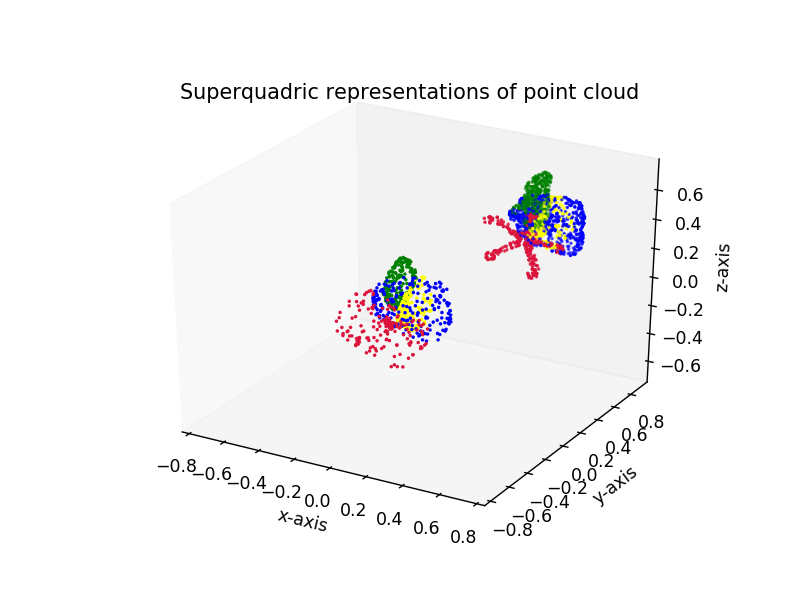

[[1.8097289e-09 1.0000000e+00 1.0000000e+00 1.8873882e-09 1.0000000e+00
  1.7239100e-09 1.8642186e-09 1.0000000e+00]]


<IPython.core.display.Javascript object>


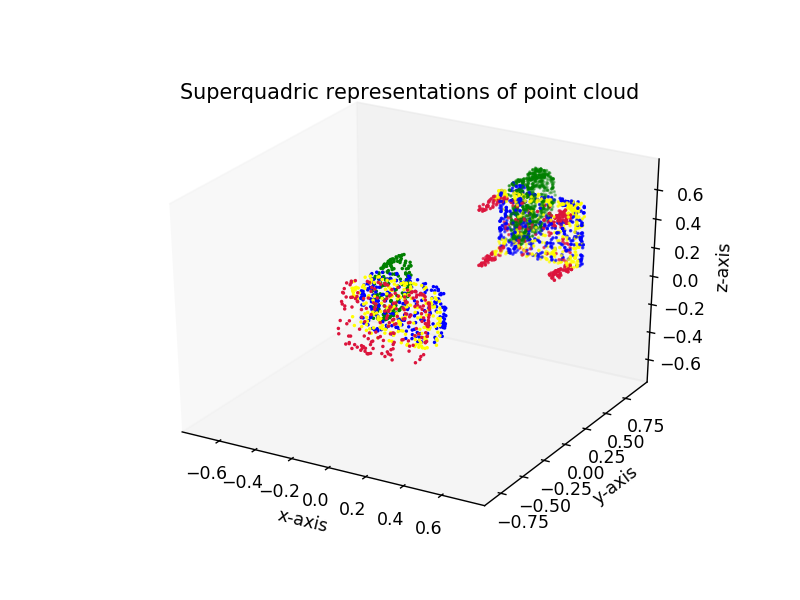

[[3.3427758e-09 1.0000000e+00 1.0000000e+00 3.4331356e-09 1.0000000e+00
  2.9658540e-09 3.3239440e-09 1.0000000e+00]]


<IPython.core.display.Javascript object>


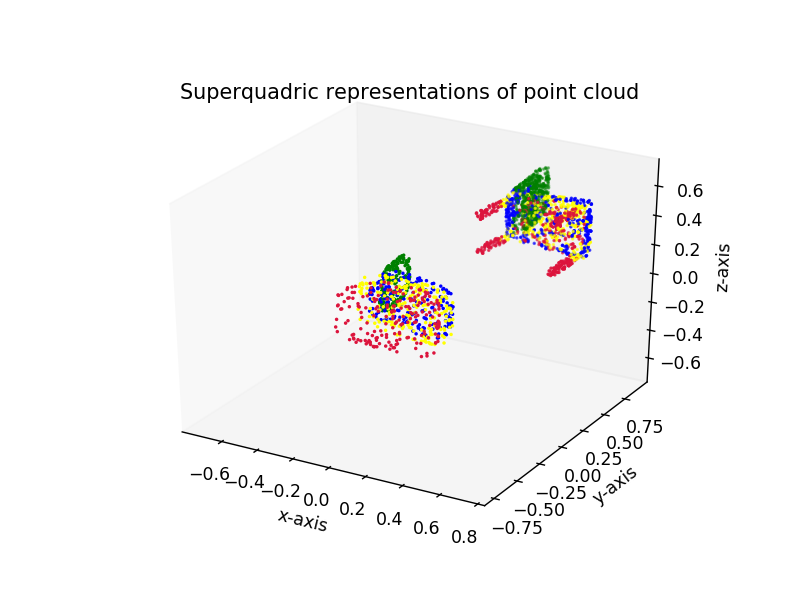

[[1.9378781e-09 1.0000000e+00 1.0000000e+00 2.0010564e-09 1.0000000e+00
  2.1384667e-09 1.9873103e-09 1.0000000e+00]]


<IPython.core.display.Javascript object>


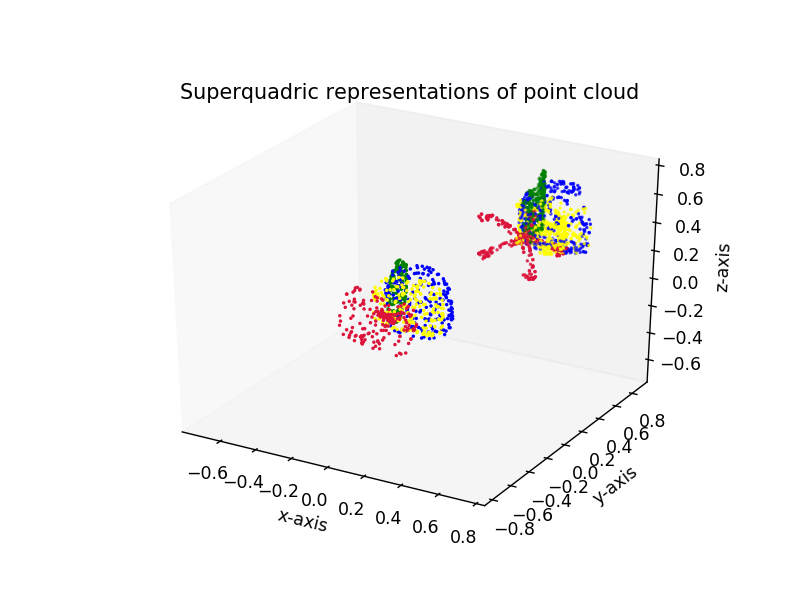

[[1.1123290e-09 1.0000000e+00 1.0000000e+00 1.1238405e-09 1.0000000e+00
  9.6817188e-10 1.1552017e-09 1.0000000e+00]]


<IPython.core.display.Javascript object>


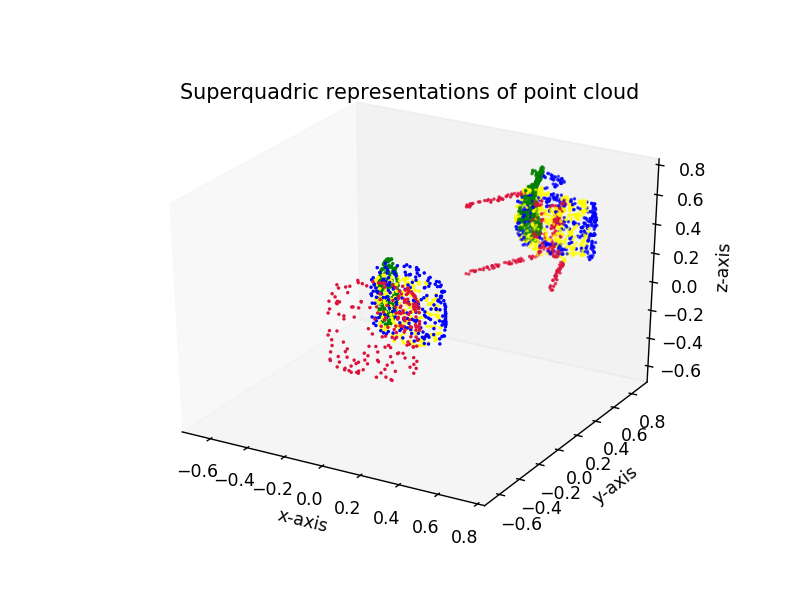

[[2.8146152e-09 1.0000000e+00 1.0000000e+00 2.8632445e-09 1.0000000e+00
  3.3669896e-09 2.7093510e-09 1.0000000e+00]]


<IPython.core.display.Javascript object>


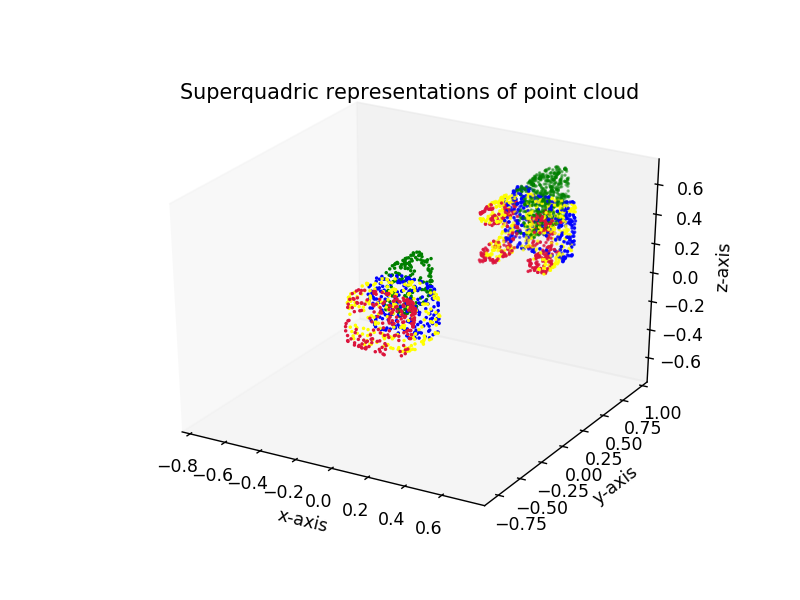

[[7.7429452e-10 1.0000000e+00 1.0000000e+00 7.9908968e-10 1.0000000e+00
  5.9974525e-10 7.4735940e-10 1.0000000e+00]]


<IPython.core.display.Javascript object>


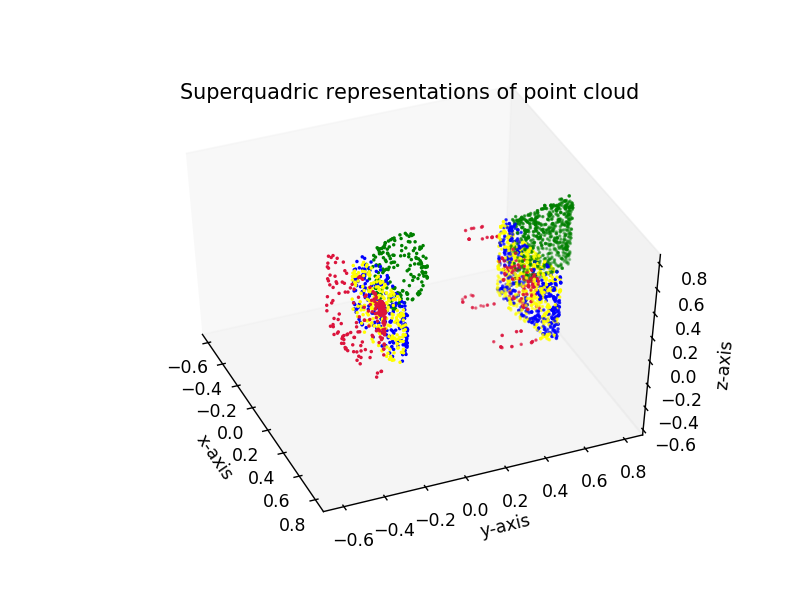

[[4.5897073e-09 1.0000000e+00 1.0000000e+00 4.7830846e-09 1.0000000e+00
  4.0487267e-09 4.6460156e-09 1.0000000e+00]]


<IPython.core.display.Javascript object>


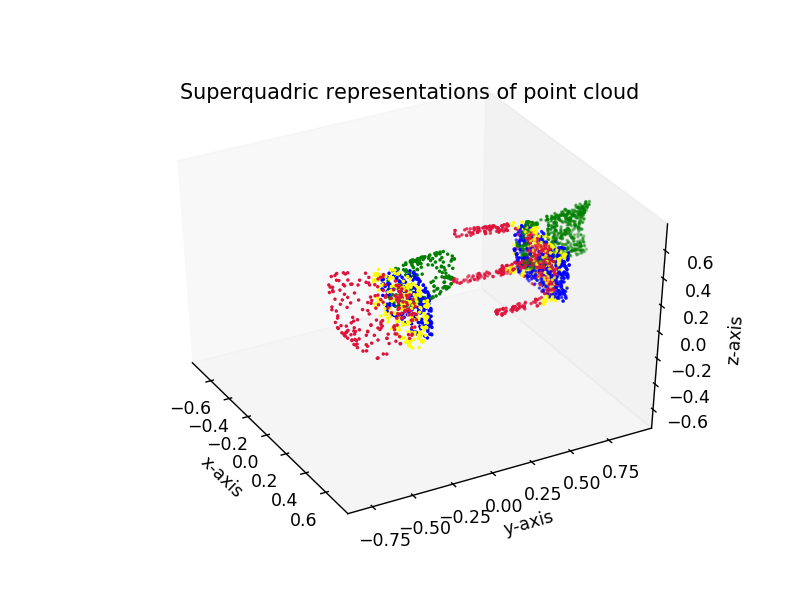

[[2.4576075e-09 1.0000000e+00 1.0000000e+00 2.4687228e-09 1.0000000e+00
  1.5907566e-09 2.4001867e-09 1.0000000e+00]]


<IPython.core.display.Javascript object>


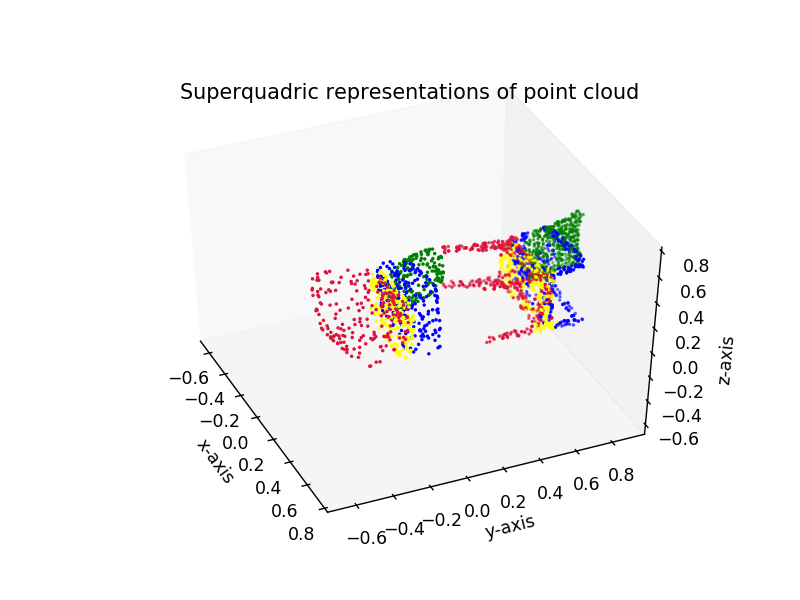

[[5.6799556e-09 9.9999988e-01 1.0000000e+00 5.8967533e-09 9.9999988e-01
  6.3263164e-09 5.6542517e-09 1.0000000e+00]]


<IPython.core.display.Javascript object>


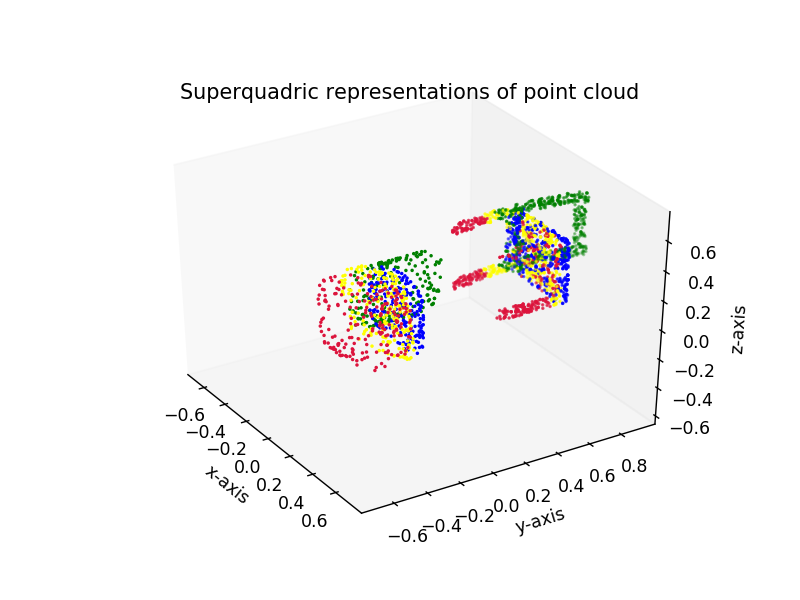

[[9.9671638e-10 1.0000000e+00 1.0000000e+00 1.0113373e-09 1.0000000e+00
  1.0452413e-09 9.8511554e-10 1.0000000e+00]]


<IPython.core.display.Javascript object>


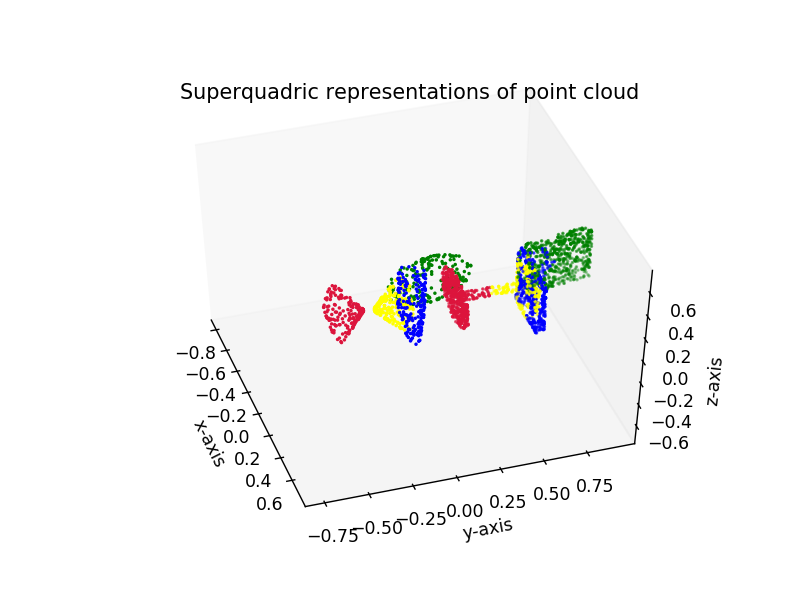

[[1.1088889e-09 1.0000000e+00 1.0000000e+00 1.1344234e-09 1.0000000e+00
  7.9333251e-10 1.0807188e-09 1.0000000e+00]]


<IPython.core.display.Javascript object>


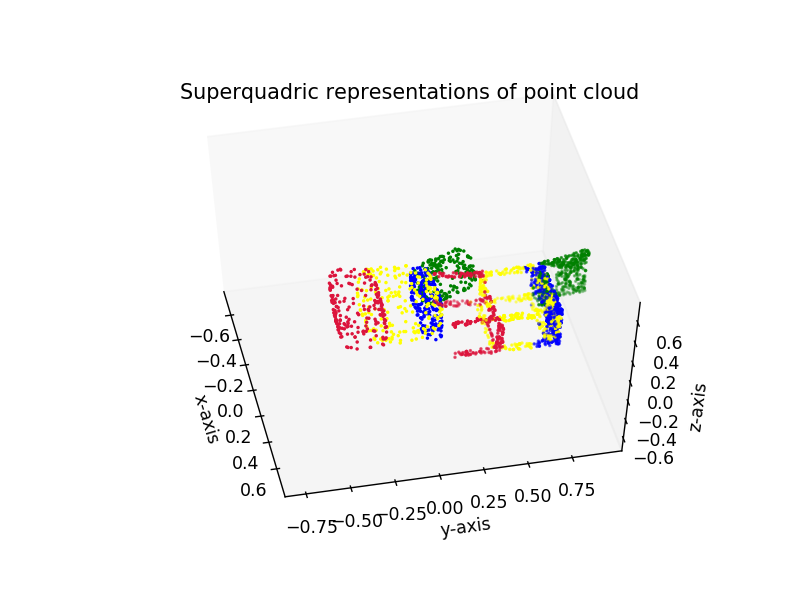

[[1.4605959e-09 1.0000000e+00 1.0000000e+00 1.5058281e-09 1.0000000e+00
  1.7087336e-09 1.5436298e-09 1.0000000e+00]]


<IPython.core.display.Javascript object>


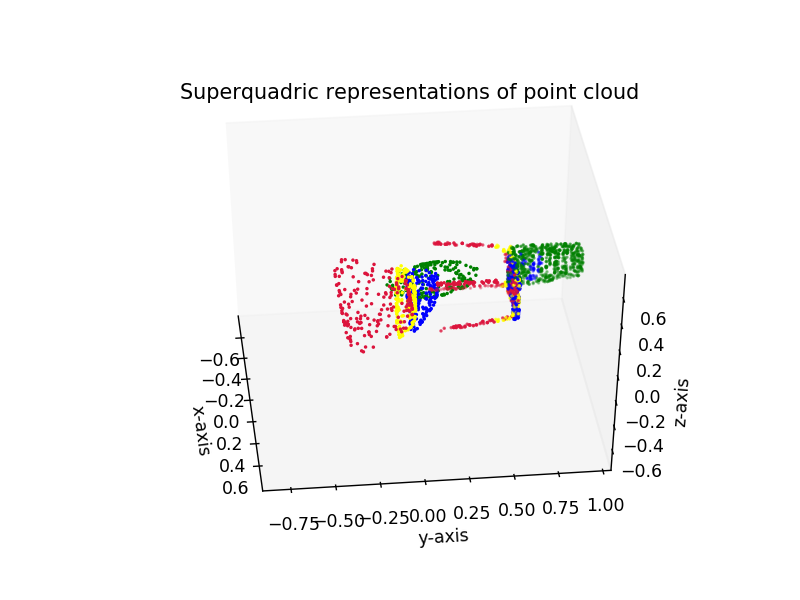

[[3.5721435e-09 1.0000000e+00 1.0000000e+00 3.6469914e-09 1.0000000e+00
  2.6108056e-09 3.6114050e-09 1.0000000e+00]]


<IPython.core.display.Javascript object>


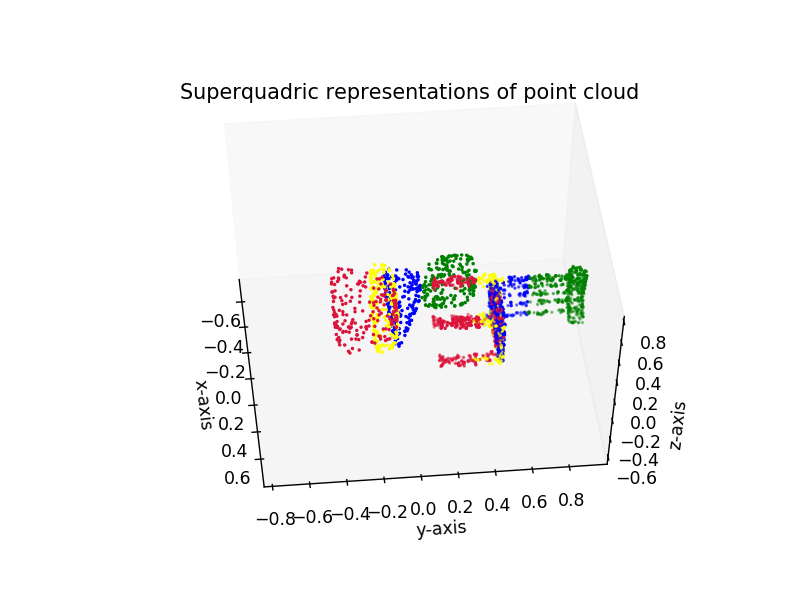

[[2.7696404e-10 1.0000000e+00 1.0000000e+00 2.9274666e-10 1.0000000e+00
  2.6366315e-10 2.8291891e-10 1.0000000e+00]]


<IPython.core.display.Javascript object>


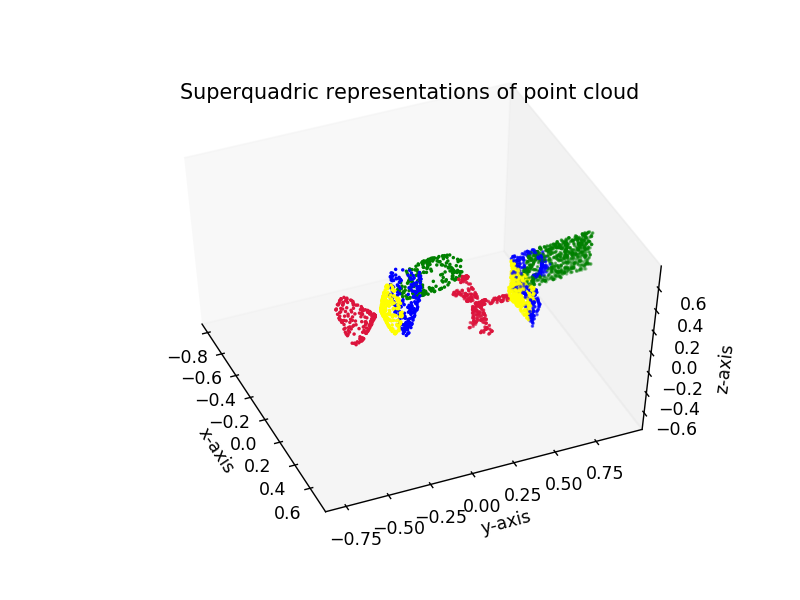

In [8]:
# model.run()

model.load()
model.vis()

In [9]:
# model.vis()